# State wise and Region wise Deployment Of ATMs

In [25]:
import pandas as pd
import glob

# Function to preprocess each dataset
def preprocess_data(file):
    # Load the first sheet from the Excel file
    df = pd.read_excel(file, sheet_name=0, engine='openpyxl',skiprows=3)
    
    # Clean column names
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
    
    # Remove unwanted columns (those that are completely empty)
    df = df.loc[:, ~df.columns.str.contains('^unnamed')]
    
    # Convert relevant columns to numeric, if they exist
    numeric_columns = ['metropolitan', 'urban', 'semi_urban', 'rural', 'grand_total']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

# Path to the directory containing the Excel files
file_path = 'Path to the directory containing the Excel files'


# Get a list of all Excel files
files = glob.glob(file_path + '*.xlsx')

# Process each file and store the results in a list
dfs = [preprocess_data(file) for file in files]

# Concatenate all DataFrames
atm_data = pd.concat(dfs, ignore_index=True)


In [26]:

atm_data.drop(columns=['name_of_bank/entity'],inplace=True)
atm_data.dropna(inplace=True)

In [27]:
atm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 1 to 1162
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   banks         877 non-null    object 
 1   metropolitan  877 non-null    float64
 2   urban         877 non-null    float64
 3   semi_urban    877 non-null    float64
 4   rural         877 non-null    float64
 5   grand_total   877 non-null    float64
dtypes: float64(5), object(1)
memory usage: 48.0+ KB


In [28]:
# Group by 'banks' and aggregate by summing up the relevant columns
aggregated_atm_data = atm_data.groupby('banks').sum().reset_index()

aggregated_atm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   banks         303 non-null    object 
 1   metropolitan  303 non-null    float64
 2   urban         303 non-null    float64
 3   semi_urban    303 non-null    float64
 4   rural         303 non-null    float64
 5   grand_total   303 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.3+ KB


# NPCI Payment data

In [5]:
# Function to preprocess digital payment dataset
def preprocess_payment_data(file):
    df = pd.read_excel(file, sheet_name=0, engine='openpyxl')
    
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
    
    # Remove unwanted columns (those that are completely empty)
    df = df.loc[:, ~df.columns.str.contains('^unnamed')]
    
    # Convert relevant columns to numeric, if they exist
    numeric_columns = ['volume_(in_mn.)', 'value_(in_cr.)']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            
    service_type = file.split('/')[-1].split('\\')[1].split('.')[0]
    df['service_type'] = service_type
    return df

In [6]:
payment_file_path = 'path to folder of excel files'

payment_files = glob.glob(payment_file_path + '*.xlsx')
payment_dfs = [preprocess_payment_data(file) for file in payment_files]
payment_data = pd.concat(payment_dfs, ignore_index=True)

In [7]:
aggregated_payment_data = payment_data.groupby(['month', 'service_type']).sum().reset_index()
# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Convert 'month' to a categorical type with the defined order
aggregated_payment_data['month'] = pd.Categorical(aggregated_payment_data['month'], categories=month_order, ordered=True)

# Sort the DataFrame by 'month'
aggregated_payment_data = aggregated_payment_data.sort_values('month').reset_index()

aggregated_payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   index            48 non-null     int64   
 1   month            48 non-null     category
 2   service_type     48 non-null     object  
 3   volume_(in_mn.)  48 non-null     float64 
 4   value_(in_cr.)   48 non-null     float64 
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 2.1+ KB


# PMJDY Data

In [8]:
pmjdy_data = pd.read_excel("PMJDY excel file", engine='openpyxl')


In [9]:
pmjdy_data.dropna(axis=1,inplace=True)
pmjdy_data.columns = pmjdy_data.columns.str.strip().str.replace(' ', '_').str.lower()
pmjdy_data.columns = pmjdy_data.columns.str.strip().str.replace(' ', '_').str.lower()
numeric_columns = ['beneficiaries_at_rural/semi-urban_centre_bank_branches', 'beneficiaries_at_urban/metro_centre_bank_branches']
pmjdy_data[numeric_columns] = pmjdy_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
pmjdy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   s.no                                                    37 non-null     int64 
 1   state_name                                              37 non-null     object
 2   beneficiaries_at_rural/semi-urban_centre_bank_branches  37 non-null     int64 
 3   beneficiaries_at_urban/metro_centre_bank_branches       37 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


# Global Findex Data

In [10]:
file = "path to excel file"
findex_data = pd.read_excel(file, sheet_name=0, engine='openpyxl')

In [11]:
findex_data = findex_data[findex_data['Country name']=='India']

# Visualization

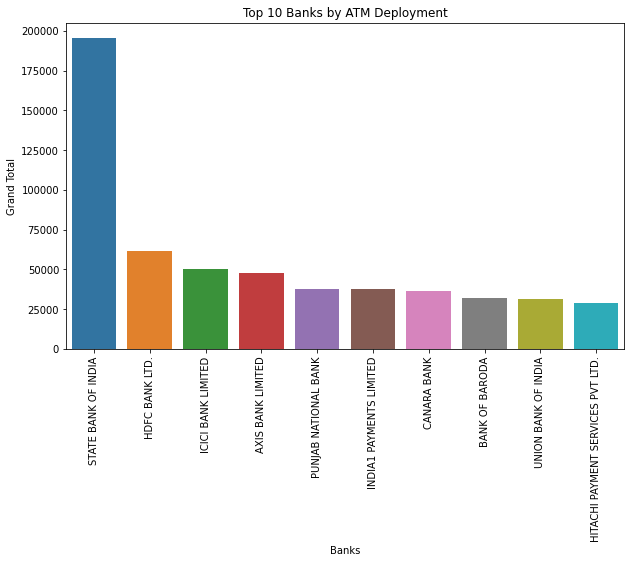

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# List of bank names to be removed
unwanted_banks = ['TOTAL', 'GRAND TOTAL', 'TOTAL (BANKS)', 'TOTAL(WLOs)','TOTAL(BANKS)','Grand Total','TOTAL (WLOs)	','TOTAL (WLOs)']

# Filter out the unwanted bank names
filtered_atm_data = aggregated_atm_data[~aggregated_atm_data['banks'].isin(unwanted_banks)]

# Get the top N banks by grand total
top_n = 10  
top_banks = filtered_atm_data.nlargest(top_n, 'grand_total')

# Plot ATM deployment for top N banks
plt.figure(figsize=(10, 6))
sns.barplot(x='banks', y='grand_total', data=top_banks)
plt.xticks(rotation=90)
plt.title(f'Top {top_n} Banks by ATM Deployment')
plt.ylabel('Grand Total')
plt.xlabel('Banks')
plt.show()


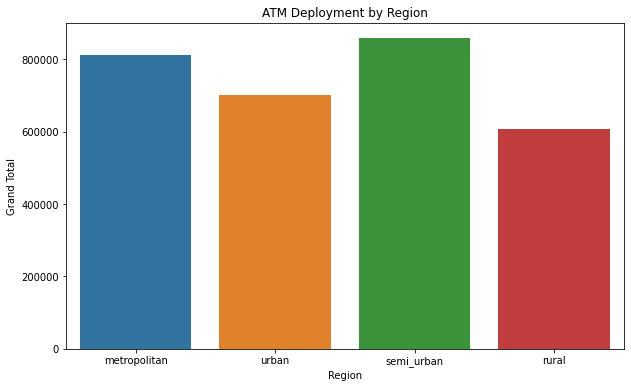

In [32]:
# Aggregating ATM deployment data by region
aggregated_by_region = atm_data.groupby(['metropolitan', 'urban', 'semi_urban', 'rural']).sum().reset_index()

# Plot ATM deployment by region
plt.figure(figsize=(10, 6))
regions = ['metropolitan', 'urban', 'semi_urban', 'rural']
totals = [
    aggregated_by_region['metropolitan'].sum(),
    aggregated_by_region['urban'].sum(),
    aggregated_by_region['semi_urban'].sum(),
    aggregated_by_region['rural'].sum()
]

sns.barplot(x=regions, y=totals)
plt.title('ATM Deployment by Region')
plt.ylabel('Grand Total')
plt.xlabel('Region')
plt.show()


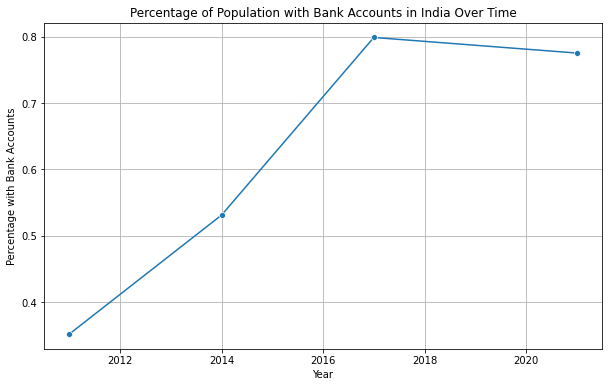

In [35]:
# Plot the percentage of the population with bank accounts over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Account (% age 15+)', data=findex_data, marker='o')
plt.title('Percentage of Population with Bank Accounts in India Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage with Bank Accounts')
plt.grid(True)
plt.show()




# Digital Payment Trends in 2023

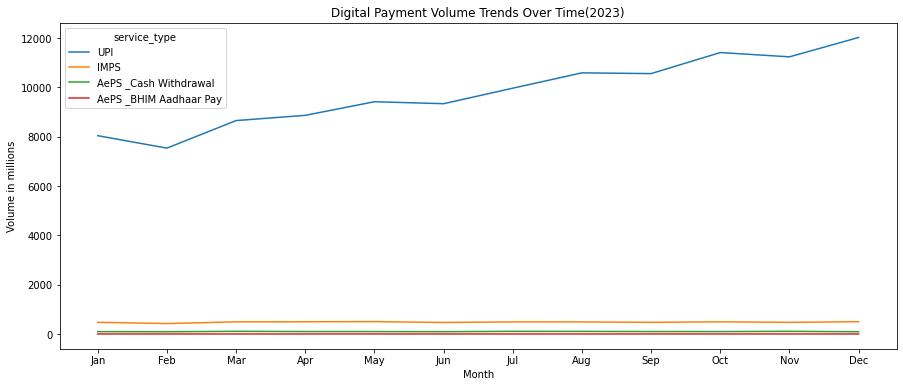

In [33]:
# Plot digital payment trends over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='month', y='volume_(in_mn.)', hue='service_type', data=aggregated_payment_data)
plt.title('Digital Payment Volume Trends Over Time(2023)')
plt.xlabel('Month')
plt.ylabel('Volume in millions')
plt.show()


C:\Users\HP\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


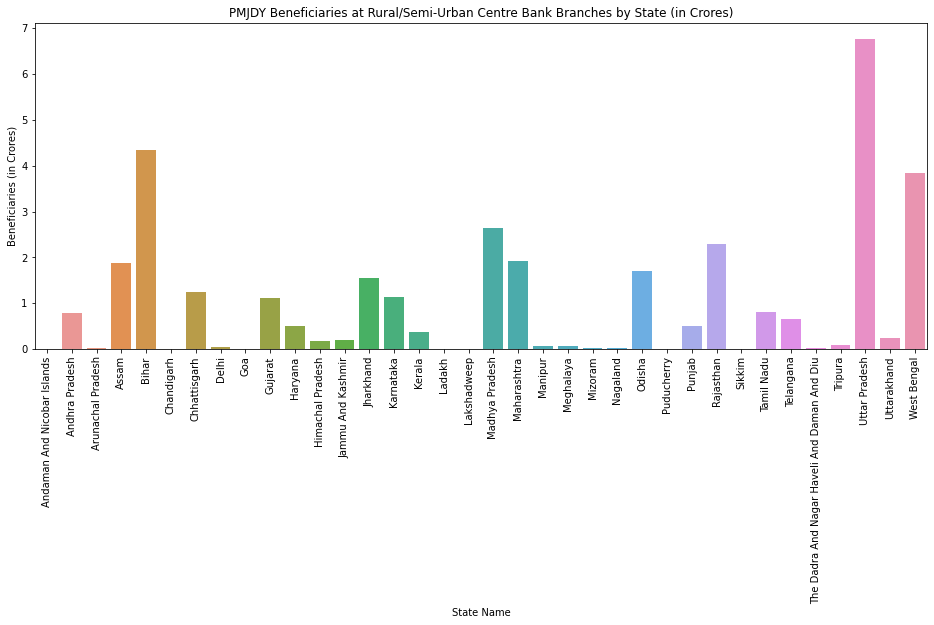

In [34]:
filtered_pmjdy_data = pmjdy_data[~pmjdy_data['state_name'].isin(['Total','total'])]

filtered_pmjdy_data['beneficiaries_at_rural/semi-urban_centre_bank_branches'] = (
    filtered_pmjdy_data['beneficiaries_at_rural/semi-urban_centre_bank_branches'] / 10_000_000
)
# Plot PMJDY beneficiaries by state
plt.figure(figsize=(16, 6))
sns.barplot(x='state_name', y='beneficiaries_at_rural/semi-urban_centre_bank_branches', data=filtered_pmjdy_data)
plt.xticks(rotation=90)
plt.title('PMJDY Beneficiaries at Rural/Semi-Urban Centre Bank Branches by State (in Crores)')
plt.ylabel('Beneficiaries (in Crores)')
plt.xlabel('State Name')
plt.show()